In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("../data/spx_data.csv", index_col=0)

# Convert Date column into three separate columns: Year, Month, Day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# Also indicate the weekday as number
df['Weekday'] = df['Date'].dt.weekday

# remove the original Date column
df.drop(columns=['Date'], inplace=True)

# Daily return
df['Return'] = df['Close'].pct_change()

# Log return
df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1))

df.head()

,Close,High,Low,Open,Volume,Year,Month,Day,Weekday,Return,Log Return
0,1455.219971,1478.000000,1438.359985,1469.250000,931800000,2000,1,3,0,NaN,NaN
1,1399.420044,1455.219971,1397.430054,1455.219971,1009000000,2000,1,4,1,-0.038345,-0.039099
2,1402.109985,1413.270020,1377.680054,1399.420044,1085500000,2000,1,5,2,0.001922,0.001920
3,1403.449951,1411.900024,1392.099976,1402.109985,1092300000,2000,1,6,3,0.000956,0.000955
4,1441.469971,1441.469971,1400.729980,1403.449951,1225200000,2000,1,7,4,0.027090,0.026730


In [17]:
# Lagged returns
df['Log Return Lag-1'] = df['Log Return'].shift(1)
df['Log Return Lag-2'] = df['Log Return'].shift(2)
df['Log Return Lag-5'] = df['Log Return'].shift(5)

df.head()

,Close,High,Low,Open,Volume,Year,Month,Day,Weekday,Return,Log Return,Log Return Lag-1,Log Return Lag-2,Log Return Lag-5
0,1455.219971,1478.000000,1438.359985,1469.250000,931800000,2000,1,3,0,NaN,NaN,NaN,NaN,NaN
1,1399.420044,1455.219971,1397.430054,1455.219971,1009000000,2000,1,4,1,-0.038345,-0.039099,NaN,NaN,NaN
2,1402.109985,1413.270020,1377.680054,1399.420044,1085500000,2000,1,5,2,0.001922,0.001920,-0.039099,NaN,NaN
3,1403.449951,1411.900024,1392.099976,1402.109985,1092300000,2000,1,6,3,0.000956,0.000955,0.001920,-0.039099,NaN
4,1441.469971,1441.469971,1400.729980,1403.449951,1225200000,2000,1,7,4,0.027090,0.026730,0.000955,0.001920,NaN


In [18]:
# Rolling statistics
df['Rolling Mean 5'] = df['Log Return'].rolling(5).mean()
df['Rolling Std 20'] = df['Log Return'].rolling(20).std()
df['Rolling Skew 30'] = df['Log Return'].rolling(30).skew()
df['Rolling Kurt 30'] = df['Log Return'].rolling(30).kurt()

df.head()

,Close,High,Low,Open,Volume,Year,Month,Day,Weekday,Return,Log Return,Log Return Lag-1,Log Return Lag-2,Log Return Lag-5,Rolling Mean 5,Rolling Std 20,Rolling Skew 30,Rolling Kurt 30
0,1455.219971,1478.000000,1438.359985,1469.250000,931800000,2000,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1399.420044,1455.219971,1397.430054,1455.219971,1009000000,2000,1,4,1,-0.038345,-0.039099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1402.109985,1413.270020,1377.680054,1399.420044,1085500000,2000,1,5,2,0.001922,0.001920,-0.039099,NaN,NaN,NaN,NaN,NaN,NaN
3,1403.449951,1411.900024,1392.099976,1402.109985,1092300000,2000,1,6,3,0.000956,0.000955,0.001920,-0.039099,NaN,NaN,NaN,NaN,NaN
4,1441.469971,1441.469971,1400.729980,1403.449951,1225200000,2000,1,7,4,0.027090,0.026730,0.000955,0.001920,NaN,NaN,NaN,NaN,NaN


In [19]:
# drop NaN values
df = df.dropna()

df.head()

,Close,High,Low,Open,Volume,Year,Month,Day,Weekday,Return,Log Return,Log Return Lag-1,Log Return Lag-2,Log Return Lag-5,Rolling Mean 5,Rolling Std 20,Rolling Skew 30,Rolling Kurt 30
30,1402.050049,1407.719971,1376.250000,1389.939941,1092100000,2000,2,15,1,0.008713,0.008675,0.002031,-0.021192,0.012198,-0.005580,0.013786,-0.625913,0.582261
31,1387.670044,1404.550049,1385.579956,1402.050049,1018800000,2000,2,16,2,-0.010256,-0.010309,0.008675,0.002031,-0.021035,-0.003435,0.013900,-0.285637,0.249951
32,1388.260010,1399.880005,1380.069946,1387.670044,1034800000,2000,2,17,3,0.000425,0.000425,-0.010309,0.008675,0.003620,-0.004074,0.013867,-0.274113,0.251292
33,1346.089966,1388.589966,1345.319946,1388.260010,1042300000,2000,2,18,4,-0.030376,-0.030847,0.000425,-0.010309,-0.021192,-0.006005,0.015295,-0.329597,-0.034608
34,1352.170044,1358.109985,1331.880005,1346.089966,980000000,2000,2,22,1,0.004517,0.004507,-0.030847,0.000425,0.002031,-0.005510,0.014234,-0.562546,0.035657


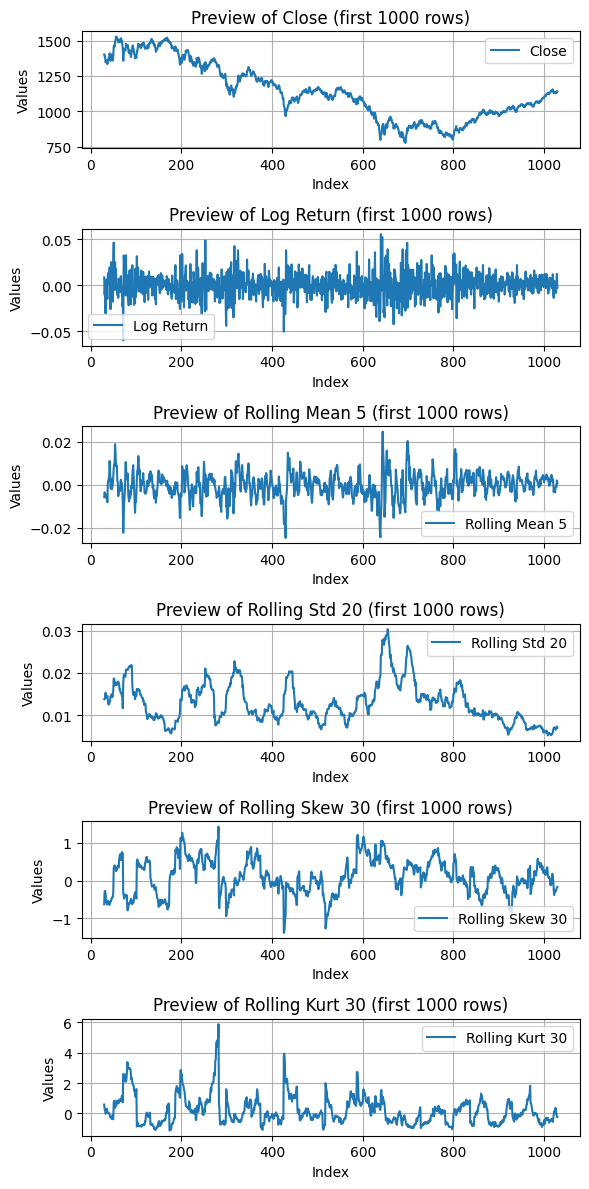

In [20]:
import bm_tools

bm_tools.plot_preview(df, ['Close', 'Log Return', 'Rolling Mean 5', 'Rolling Std 20', 'Rolling Skew 30', 'Rolling Kurt 30'], window=1000)

In [21]:
# save to CSV
df.to_csv("../data/spx_data_with_features.csv")